In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\PREM\Desktop\Assignment of DSA\car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
# Basic details of dataset
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

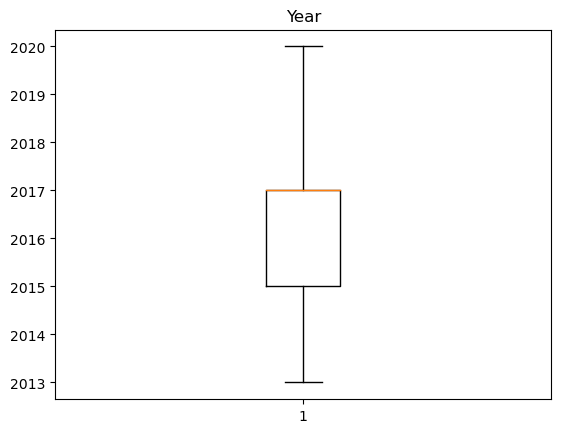

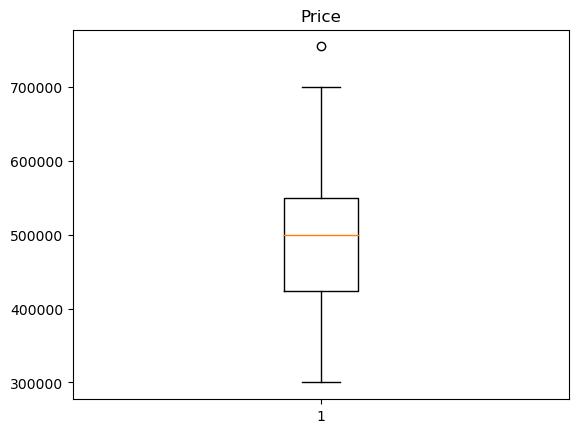

In [6]:
#Finding outliers of given data
num_cols =['Year', 'Price']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [7]:
Q1 = np.percentile(data['Price'],25,interpolation='midpoint')
Q2 = np.percentile(data['Price'],50,interpolation='midpoint')
Q3 = np.percentile(data['Price'],75,interpolation='midpoint')

C:\Users\PREM\AppData\Local\Temp\ipykernel_9364\3368312525.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Price'],25,interpolation='midpoint')
C:\Users\PREM\AppData\Local\Temp\ipykernel_9364\3368312525.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Price'],50,interpolation='midpoint')
C:\Users\PREM\AppData\Local\Temp\ipykernel_9364\3368312525.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', 

In [8]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [9]:
data['Price'].median()

500000.0

In [10]:
IQR = Q3-Q1
print(IQR)

127500.0


In [11]:
up_lim = Q3+1.5*IQR
low_lim =Q1-1.5*IQR
print(up_lim)
print(low_lim)

741250.0
231250.0


In [12]:
outliers = []
for x in data['Price']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [13]:
outliers

[755000]

In [14]:
ind1 =data['Price']>up_lim
data.loc[ind1].index

Int64Index([1], dtype='int64')

In [15]:
data.drop([1],inplace=True)

In [16]:
data.shape

(111, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x24a1c7eb070>,
 'caps': [<matplotlib.lines.Line2D at 0x24a1c7eb5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a1c7eadd0>],
 'medians': [<matplotlib.lines.Line2D at 0x24a1c7ebaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a1c7ebd90>],
 'means': []}

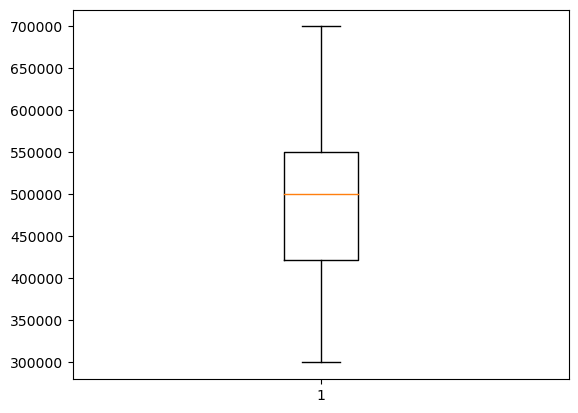

In [17]:
# Remove the outliers of price
plt.boxplot(data['Price'])

In [18]:
#onehot encoding
data1 = pd.get_dummies(data)

<Axes: >

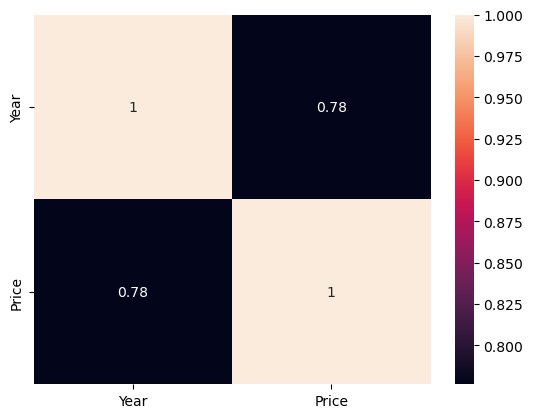

In [19]:
corrmatrix =data.corr()
sns.heatmap(corrmatrix,annot =True)

In [20]:
data.columns  

Index(['Year', 'Price'], dtype='object')

In [21]:
data1.shape

(111, 2)

In [22]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [23]:
data.describe()

,Year,Price
count,111.000000,111.000000
mean,2016.648649,481423.396396
std,1.621720,87874.563371
min,2013.000000,300000.000000
25%,2015.000000,422500.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,700000.000000


In [24]:
y = data['Price']
x =data.drop(['Price'],axis =1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
x_train,x_test

(     Year
 16   2017
 45   2018
 90   2017
 91   2017
 10   2019
 ..    ...
 107  2016
 15   2017
 93   2017
 52   2013
 103  2017
 
 [83 rows x 1 columns],
      Year
 79   2015
 11   2018
 5    2015
 85   2015
 65   2017
 69   2015
 31   2017
 46   2019
 97   2020
 12   2017
 80   2015
 81   2014
 0    2018
 82   2015
 19   2017
 71   2017
 57   2017
 73   2013
 110  2016
 43   2019
 13   2019
 37   2017
 66   2017
 27   2017
 23   2017
 32   2017
 48   2016
 77   2015)

In [28]:
y_train , y_test

(16     500000
 45     450000
 90     520000
 91     520000
 10     500000
         ...  
 107    375000
 15     500000
 93     520000
 52     345000
 103    375000
 Name: Price, Length: 83, dtype: int64,
 79     400000
 11     500000
 5      350000
 85     320000
 65     495000
 69     300000
 31     550000
 46     500000
 97     640000
 12     500000
 80     390000
 81     390000
 0      465000
 82     390000
 19     500000
 71     490000
 57     550000
 73     320000
 110    420000
 43     550000
 13     600000
 37     486000
 66     525000
 27     550000
 23     550000
 32     550000
 48     396000
 77     325000
 Name: Price, dtype: int64)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Linear regression for the model
lr = LinearRegression()

In [31]:
model = lr.fit(x_train,y_train)

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred,y_test

(array([420717.81628217, 539777.20294215, 420717.81628217, 420717.81628217,
        500090.74072215, 420717.81628217, 500090.74072215, 579463.66516215,
        619150.12738213, 500090.74072215, 420717.81628217, 381031.35406217,
        539777.20294215, 420717.81628217, 500090.74072215, 500090.74072215,
        500090.74072215, 341344.89184219, 460404.27850217, 579463.66516215,
        579463.66516215, 500090.74072215, 500090.74072215, 500090.74072215,
        500090.74072215, 500090.74072215, 460404.27850217, 420717.81628217]),
 79     400000
 11     500000
 5      350000
 85     320000
 65     495000
 69     300000
 31     550000
 46     500000
 97     640000
 12     500000
 80     390000
 81     390000
 0      465000
 82     390000
 19     500000
 71     490000
 57     550000
 73     320000
 110    420000
 43     550000
 13     600000
 37     486000
 66     525000
 27     550000
 23     550000
 32     550000
 48     396000
 77     325000
 Name: Price, dtype: int64)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [35]:
#Finding mean squared error r2 and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 2718820563.0700393
Mean Absolute Error: 41925.85756077458
R-squared Score: 0.6727697922780109


In [37]:
model_price_2022 = model.predict([[2022]])

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
print("model_price_2022:", model_price_2022)

model_price_2022: [698523.05182213]


In [39]:
from sklearn.linear_model import Lasso

In [40]:
# Lasso regression for the model
model = Lasso(alpha=0.1)

In [41]:
model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [42]:
y_pred = model.predict(x_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 2718822493.379424
Mean Absolute Error: 41925.87503661907
R-squared Score: 0.6727695599509684


In [45]:
model_price_2022 = model.predict([[2022]])

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [46]:
print("model_price_2022:", model_price_2022)

model_price_2022: [698522.84739774]


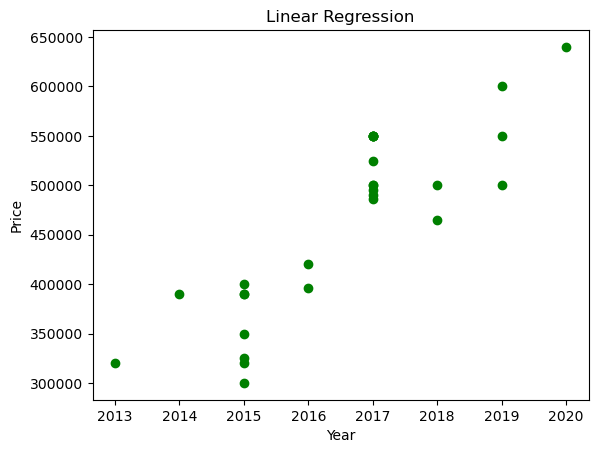

In [47]:
#plot the scatter plot of the data points
plt.scatter(x_test,y_test,color='green',label='Actual')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

In [48]:
#There is no such difference between the r-squared value of linear and lasso Regression